In [56]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

def z_score(data_frame):
    return (data_frame-data_frame.mean())/data_frame.std()

def min_max (data_frame):
    return (data_frame-data_frame.min())/(data_frame.max()-data_frame.min())

def mapa_correlacao (data_frame):
    correlations = data_frame.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [57]:
df = pd.read_csv("C:/Users/14.01587-0/Desktop/Maua/Intelig-ncia-Artificial/precos_casa_california.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
6,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,NaN,281500.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY


In [58]:

df_sem_na = df.replace(r'^\s+$', np.NaN, regex=True) #substitui espaços em branco
df_sem_na = df_sem_na.dropna(axis="rows") #limpa tuplas com NaN


df_sem_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY
10,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,NEAR BAY
11,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY


In [59]:
ocean_prox = df_sem_na['ocean_proximity']
one_hot = pd.get_dummies(ocean_prox)
df_one_hot = pd.concat([df_sem_na,one_hot],axis=1) #junta o df com o one-hotting
df_one_hot = df_one_hot.drop('ocean_proximity',axis='columns')

df_one_hot = df_one_hot.apply(pd.to_numeric,errors='coerce') #converte pra numerico

df_one_hot

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,0,0,0,1,0
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,0,0,0,1,0
10,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,0,0,0,1,0
11,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,0,0,0,1,0


In [60]:
cols = df_one_hot.columns

df_norm = df_one_hot

df_norm = df_one_hot.apply(zscore) 
#df_norm = min_max(df_one_hot)

df_norm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.323531,1.050851,0.908407,-0.803210,-0.969076,-0.971973,-0.975463,2.337607,0.374262,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
2,-1.333522,1.032064,1.717763,-0.048689,-0.117202,-0.292035,0.036654,-0.114545,0.135910,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
3,-1.333522,1.032064,1.717763,0.210720,0.351329,-0.236548,0.383591,-0.397856,0.046101,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
4,-1.338518,1.032064,0.981985,-0.039571,0.299270,-0.193391,0.247946,-0.944192,0.023261,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
5,-1.333522,1.032064,1.717763,0.413597,0.398655,0.110467,0.558363,-0.097676,0.076711,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
7,-1.338518,1.036760,1.717763,0.392626,0.505140,0.069072,0.610534,-0.318764,0.046723,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
8,-1.338518,1.036760,1.717763,-0.068749,-0.152696,-0.288512,-0.083339,-0.421505,0.002751,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
9,-1.338518,1.032064,1.717763,-0.887096,-0.822364,-0.951716,-0.850252,-0.632450,-0.031744,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
10,-1.338518,1.036760,1.717763,0.000548,0.206984,-0.188107,0.313160,-1.030220,-0.081620,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
11,-1.338518,1.036760,1.570607,-0.693793,-0.604663,-0.641693,-0.615483,-0.920753,-0.111453,-0.892994,-0.685723,-0.015729,2.831264,-0.378584


In [65]:
#tirando colunas com colinearidade

outliers = [945,20444] #indices dos outliers

df_limpo = df_norm
#df_limpo = df_limpo.drop(['latitude','total_bedrooms','total_rooms','population'],1) #tirando colunas com colinearidade
df_limpo = df_limpo.drop(outliers)
df_final = df_limpo

df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.323531,1.050851,0.908407,-0.803210,-0.969076,-0.971973,-0.975463,2.337607,0.374262,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
2,-1.333522,1.032064,1.717763,-0.048689,-0.117202,-0.292035,0.036654,-0.114545,0.135910,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
3,-1.333522,1.032064,1.717763,0.210720,0.351329,-0.236548,0.383591,-0.397856,0.046101,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
4,-1.338518,1.032064,0.981985,-0.039571,0.299270,-0.193391,0.247946,-0.944192,0.023261,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
5,-1.333522,1.032064,1.717763,0.413597,0.398655,0.110467,0.558363,-0.097676,0.076711,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
7,-1.338518,1.036760,1.717763,0.392626,0.505140,0.069072,0.610534,-0.318764,0.046723,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
8,-1.338518,1.036760,1.717763,-0.068749,-0.152696,-0.288512,-0.083339,-0.421505,0.002751,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
9,-1.338518,1.032064,1.717763,-0.887096,-0.822364,-0.951716,-0.850252,-0.632450,-0.031744,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
10,-1.338518,1.036760,1.717763,0.000548,0.206984,-0.188107,0.313160,-1.030220,-0.081620,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
11,-1.338518,1.036760,1.570607,-0.693793,-0.604663,-0.641693,-0.615483,-0.920753,-0.111453,-0.892994,-0.685723,-0.015729,2.831264,-0.378584


In [66]:
features = df_final.drop("median_house_value",1)
target = df_final["median_house_value"]
dados_treino_feat,dados_valid_feat,dados_treino_targ,dados_valid_targ = sklearn.model_selection.train_test_split(features,target,test_size=0.3)
#features, target

dados_valid_feat, dados_valid_targ

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 17237  -0.479273 -0.315935           -0.415995    -0.587567       -0.457951   
 1391   -1.243601  1.097820           -1.225351     1.948169        2.604063   
 10218   0.874536 -0.818499           -0.415995    -0.089265       -0.422457   
 12583  -0.928878  1.342056           -0.121683    -0.052336       -0.235517   
 3741    0.604773 -0.686987            0.466940     0.140055        0.604525   
 19741   0.120200  0.318141           -1.666818     0.284576        0.154925   
 7960    0.734659 -0.851377            0.540517    -0.391073       -0.557337   
 5638    0.649734 -0.898345            0.761251    -0.018144        0.623456   
 2527   -1.308544  1.816439            0.614095    -0.129384       -0.297042   
 3961    0.484879 -0.677593            0.025472    -0.441678       -0.602297   
 6265    0.834571 -0.752743           -1.004618     2.784296        2.892753   
 45     -1.343513  1.022670            0

In [76]:
#clf = linear_model.SGDClassifier(loss='perceptron')
#clf = linear_model.Lasso(max_iter=1000)  
#clf = linear_model.ElasticNet(1)
clf = neural_network.MLPRegressor(hidden_layer_sizes=(11,11,11),max_iter=200,verbose = True,batch_size=32)
#clf = ensemble.BaggingRegressor
clf = clf.fit(dados_treino_feat,dados_treino_targ)

precisao_treino = clf.score(dados_treino_feat,dados_treino_targ)
precisao_valid = clf.score(dados_valid_feat,dados_valid_targ)

precisao_treino, precisao_valid

Iteration 1, loss = 0.03660434
Iteration 2, loss = 0.00674306
Iteration 3, loss = 0.00606712
Iteration 4, loss = 0.00566244
Iteration 5, loss = 0.00536833
Iteration 6, loss = 0.00515620
Iteration 7, loss = 0.00536329
Iteration 8, loss = 0.00486330
Iteration 9, loss = 0.00464169
Iteration 10, loss = 0.00454468
Iteration 11, loss = 0.00445686
Iteration 12, loss = 0.00438077
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


(0.7417741507800495, 0.7227683879669282)

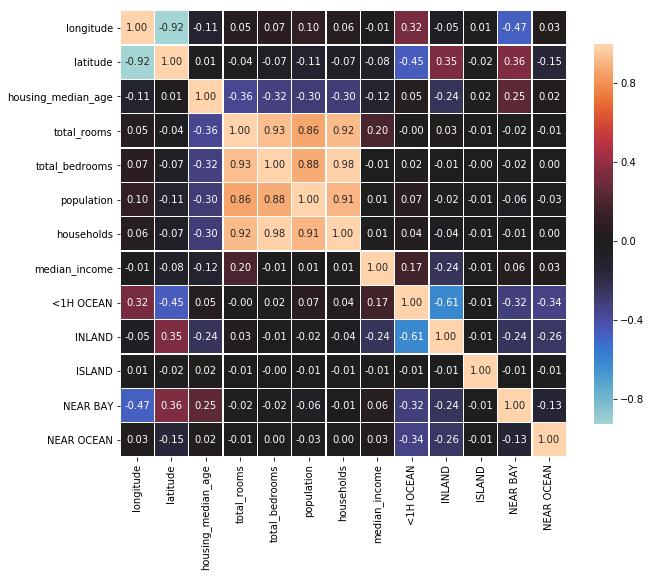

In [68]:
mapa_correlacao(df_limpo.drop("median_house_value",1))

In [69]:
#dados_treino_feat,dados_valid_feat,dados_treino_targ,dados_valid_targ
dados_treino_feat,dados_treino_targ

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 7885    0.714677 -0.837286            0.393362    -0.108868       -0.297042   
 11691  -0.848948  1.454781            0.319784     0.794277        0.566664   
 6538    0.724668 -0.677593            1.202718    -0.651394       -0.786869   
 38     -1.338518  1.032064            1.497030    -0.879346       -0.796335   
 875    -1.213628  0.900551           -0.342417    -0.035924       -0.126667   
 15143   1.099339 -1.151976           -0.857462    -1.043471       -1.009303   
 13287   0.969453 -0.776227            0.025472    -0.746222       -0.914650   
 19361  -0.689089  0.938126            0.540517    -1.177051       -1.245935   
 1486   -1.223619  1.083729            0.246206    -0.313113       -0.533673   
 1611   -1.263584  1.046154            0.319784     0.344756       -0.091172   
 11142   0.834571 -0.851377            0.246206    -0.358704       -0.027282   
 2619   -2.242723  2.427031           -0

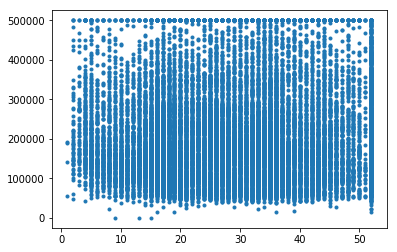

In [70]:
plt.figure()

#df_vis = pd.concat([df_sem_na['ocean_proximity'],df_one_hot['median_house_value']],axis=1)
df_vis = df_one_hot
df_vis.drop(outliers,inplace=True)

plt.scatter(df_vis['housing_median_age'],df_vis['median_house_value'],marker='.')


In [64]:
#df_final.loc(df_final['housing_median_age'].argmax())
df_sem_na.loc(945)

ValueError: No axis named 945 for object type <class 'pandas.core.frame.DataFrame'>